In [83]:
%matplotlib inline


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
import seaborn as sns
from sklearn.svm import SVC
from sklearn import svm
from sklearn import neighbors as nbhs
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from sklearn import ensemble
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import naive_bayes

In [84]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# Function for concatation
def combine(data1,data2):
    fulldf = pd.concat([data1,data2])
    return fulldf

# Function for separation
def saperate(data):
    data1 = data.iloc[:len(traindf)]
    data2 = data.iloc[len(traindf):]
    return data1, data2

In [85]:
###____________ Data Preprocessing ____________###

In [86]:
train_test_data = [train, test]

In [87]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

In [88]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # setting seaborn default for plots

def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

In [89]:
sex_mapping = {"male": 0, "female": 1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

In [90]:
train_test_data = [train, test] # combining train and test dataset

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [91]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [92]:
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [93]:
# fill missing age with median age for each title (Mr, Mrs, Miss, Others)
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)

In [94]:
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0,
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1,
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2,
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3,
    dataset.loc[ dataset['Age'] > 62, 'Age'] = 4

In [95]:
train.drop('Cabin', axis=1, inplace=True)
test.drop('Cabin', axis=1, inplace=True)

In [96]:
train.drop('Ticket', axis=1, inplace=True)
test.drop('Ticket', axis=1, inplace=True)
train.head(2)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,0,1.0,1,0,7.2500,S,0
1,2,1,1,1,3.0,1,0,71.2833,C,2


In [97]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [98]:
embarked_mapping = {"S": 0, "C": 1, "Q": 2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

In [99]:
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)

In [100]:
###____________ References ____________###



# https://towardsdatascience.com/predicting-the-survival-of-titanic-passengers-30870ccc7e8

In [101]:
from sklearn.model_selection import train_test_split

X=train.drop(["Survived"],axis=1)
y=train["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# XTEST = test

In [102]:
profit = [[-100 , -100],[-500 , -10]]
TNp = profit[0][0] #true not survived
FNp = profit[0][1] #false not survived
FPp = profit[1][0] #false survived
TPp = profit[1][1] #true survived

In [103]:
#True probabilities:
pp = 1/2
pn = 1/2

In [104]:
def roc(method):
    fpr, tpr, thresholds = metrics.roc_curve(y_test, method.predict(X_test))
    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.title('ROC curve')
    plt.xlabel('False Positive')
    plt.ylabel('True Positive')
    plt.grid(True)

In [105]:
def rates(TP,FP,FN,TN):
    return TP/(TP + FN), FP/(FP + TN), FN/(FN + TP), TN/(TN + FP)

def curves(model,X_test,y_test):
    scores = model.predict_proba(X_test)
    if scores.shape[1] > 1:
        scores = scores[:,1]
    y_test = y_test.to_numpy()
    scoreY = [(scores[k] , y_test[k]) for k in range(len(y_test))]
    scoreY.sort(key=(lambda x: x[0]),reverse=True)
    
    Profit = np.zeros(len(y_test)+1)
    CumResp = np.zeros(len(y_test)+1)
    Lift = np.zeros(len(y_test)+1)
    ROC = np.zeros((len(y_test)+1,2))
    AUC = 0
    x0 = 0
    
    TP, FP, FN, TN = 0, 0, sum(y_test == True), sum(y_test == False)
    TPR, FPR, FNR, TNR = rates(TP,FP,FN,TN)
    Profit[0] = pp*(TPR*TPp + FNR*FNp)+pn*(FPR*FPp + TNR*TNp)
    CumResp[0] = 0
    Lift[0] = 1
    ROC[0,:] = FPR, TPR
    if FPR > x0:
        AUC += TPR*(FPR-x0)
        x0 = FPR
    
    for k in range(len(y_test)):
        if scoreY[k][1]:
            TP = TP + 1
            FN = FN - 1
        else:
            FP = FP + 1
            TN = TN - 1
        TPR, FPR, FNR, TNR = rates(TP,FP,FN,TN)
        kk = k+1
        Profit[kk] = pp*(TPR*TPp + FNR*FNp)+pn*(FPR*FPp + TNR*TNp)
        CumResp[kk] = TPR
        Lift[kk] = TPR/(kk/len(y_test))
        ROC[kk,:] = FPR, TPR
        if FPR > x0:
            AUC += TPR*(FPR-x0)
            x0 = FPR
    AUC += 1-x0
    return Profit, CumResp, Lift, ROC, AUC

In [106]:
x = range(len(y_test)+1)
x = [x[k]/len(y_test) for k in range(len(x))]

def plot_curves(Profit, Cumulative, Lift, ROC, curve_type):
    #Profit Curves
    plt.figure()
    plt.plot([0,1],[nbcProfit[0],nbcProfit[-1]])
    plt.plot(x,Profit)
    plt.legend(("Random", curve_type))
    plt.title("Profit Curve")
    plt.xlabel("% Data")
    plt.ylabel("Profit ($)")

    #Cumulative Response Curves
    plt.figure()
    plt.plot([0,1],[0,1])
    plt.plot(x,Cumulative)
    plt.legend(("Random", curve_type))
    plt.title("Cumulative Response Curve")
    plt.xlabel("% Data")
    plt.ylabel("TPR")

    #Lift Curves
    plt.figure()
    plt.plot(x,np.ones(len(x)))
    plt.plot(x,Lift)
    plt.legend(("Random", curve_type))
    plt.title("Lift Curve")
    plt.xlabel("% Data")
    plt.ylabel("Lift")

    #ROC Curves
    plt.figure()
    plt.plot([0,1],[0,1])
    plt.plot(ROC[:,0],ROC[:,1])
    plt.legend(("Random", curve_type))
    plt.title("ROC Curve")
    plt.xlabel("FPR")
    plt.ylabel("TPR")

## Naive Bayes

[[96 11]
 [19 53]]
Expected profit on THIS dataset: -29.115168539325843
Expected profit for comparison: -95.77785326086956
nbcAUC: 0.8877717391304348


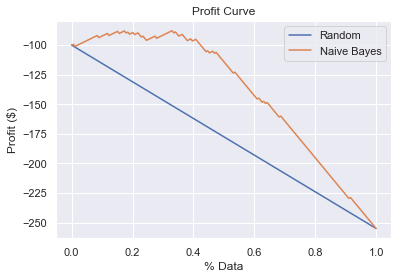

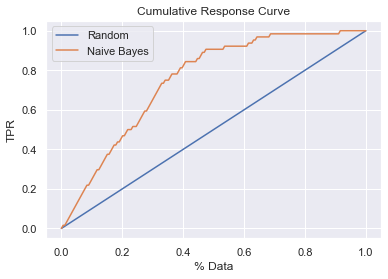

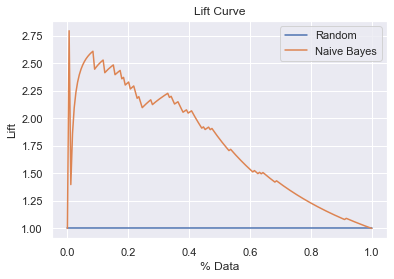

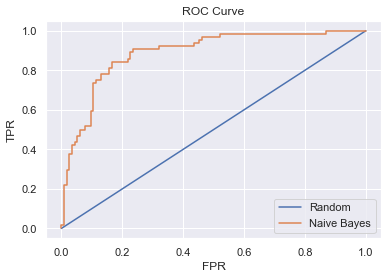

In [107]:
nbc = naive_bayes.GaussianNB()
nbc.fit(X_train,np.ravel(y_train))
CMnorm = confusion_matrix(nbc.predict(X_test), y_test)
print(CMnorm)
TN, FN, FP, TP = CMnorm.ravel()
print(f"Expected profit on THIS dataset: {np.sum(CMnorm*profit)/len(y_train)}")

TPR = TP/(TP + FN)
FPR = FP/(FP + TN)
FNR = FN/(FN + TP)
TNR = TN/(TN + FP)
print(f"Expected profit for comparison: {pp*(TPR*TPp + FNR*FNp)+pn*(FPR*FPp + TNR*TNp)}")
nbcProfit, nbcCumResp, nbcLift, nbcROC, nbcAUC = curves(nbc,X_test,y_test)
print("nbcAUC: " + str(nbcAUC))

plot_curves(nbcProfit, nbcCumResp, nbcLift, nbcROC, "Naive Bayes")

## Multiple logistic regression

[[92 18]
 [18 51]]
Expected profit on THIS dataset: -28.8061797752809
Expected profit for comparison: -99.46640316205533
logregAUC: 0.8581027667984202


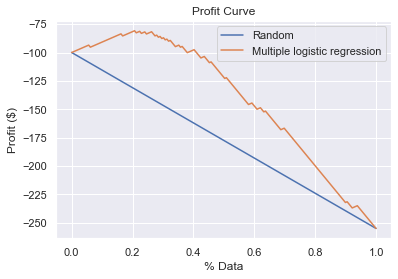

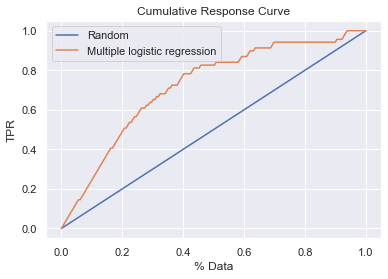

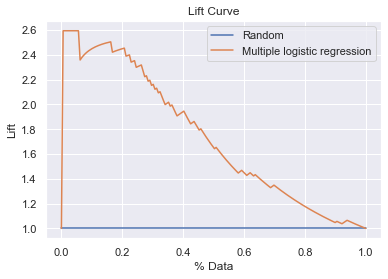

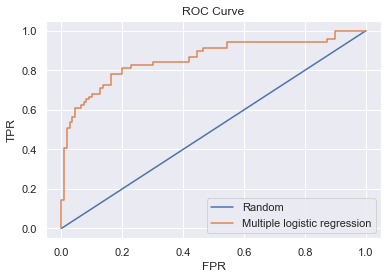

In [73]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, np.ravel(y_train))

CMnorm = confusion_matrix(logreg.predict(X_test), y_test)
print(CMnorm)
TN, FN, FP, TP = CMnorm.ravel()
print(f"Expected profit on THIS dataset: {np.sum(CMnorm*profit)/len(y_train)}")

TPR = TP/(TP + FN)
FPR = FP/(FP + TN)
FNR = FN/(FN + TP)
TNR = TN/(TN + FP)
print(f"Expected profit for comparison: {pp*(TPR*TPp + FNR*FNp)+pn*(FPR*FPp + TNR*TNp)}")
logregProfit, logregCumResp, logregLift, logregROC, logregAUC = curves(logreg,X_test,y_test)
print("logregAUC: " + str(logregAUC))


plot_curves(logregProfit, logregCumResp, logregLift, logregROC, "Multiple logistic regression")

## Support vector machine with linear kernel

[[91 17]
 [19 52]]
Expected profit on THIS dataset: -29.241573033707866
Expected profit for comparison: -100.63241106719369
svclAUC: 0.8393939393939396


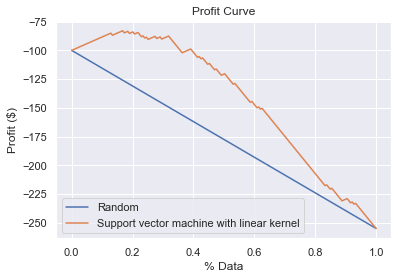

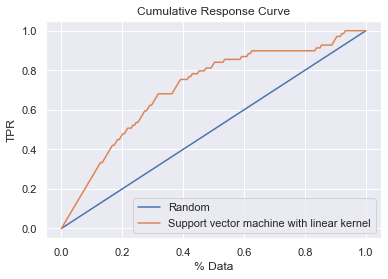

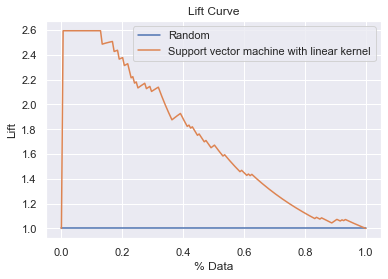

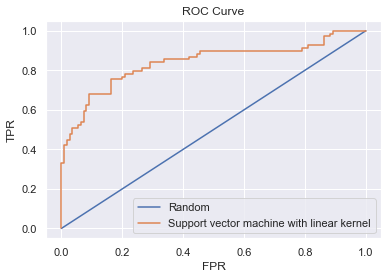

In [74]:
svcl = svm.SVC(kernel='linear', probability = True)
svcl.fit(X_train,np.ravel(y_train))
CMnorm = confusion_matrix(svcl.predict(X_test), y_test)
print(CMnorm)
TN, FN, FP, TP = CMnorm.ravel()
print(f"Expected profit on THIS dataset: {np.sum(CMnorm*profit)/len(y_train)}")

TPR = TP/(TP + FN)
FPR = FP/(FP + TN)
FNR = FN/(FN + TP)
TNR = TN/(TN + FP)
print(f"Expected profit for comparison: {pp*(TPR*TPp + FNR*FNp)+pn*(FPR*FPp + TNR*TNp)}")
svclProfit, svclCumResp, svclLift, svclROC, svclAUC = curves(svcl,X_test,y_test)
print("svclAUC: " + str(svclAUC))
plot_curves(svclProfit, svclCumResp, svclLift, svclROC, "Support vector machine with linear kernel")

## Support vector machine with radial basis function kernel

[[105  66]
 [  5   3]]
Expected profit on THIS dataset: -27.570224719101123
Expected profit for comparison: -107.13438735177866
svcrbfAUC: 0.6397891963109358


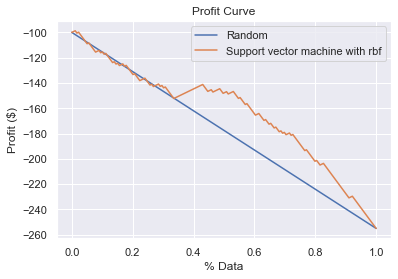

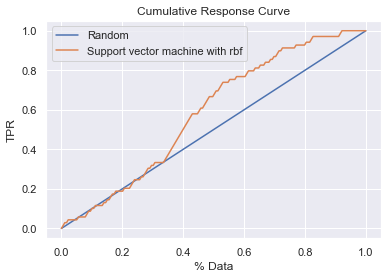

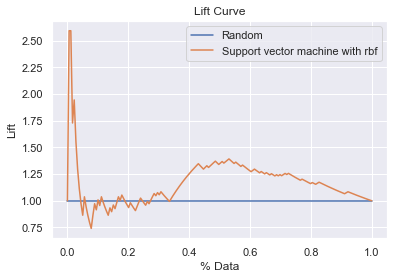

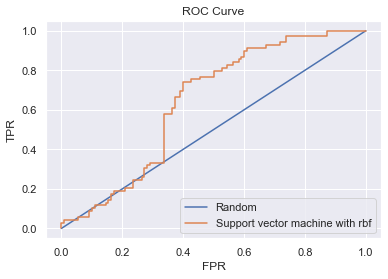

In [75]:
svcrbf = svm.SVC(kernel='rbf',gamma='auto', probability = True)
svcrbf.fit(X_train,np.ravel(y_train))
CMnorm = confusion_matrix(svcrbf.predict(X_test), y_test)
print(CMnorm)
TN, FN, FP, TP = CMnorm.ravel()
print(f"Expected profit on THIS dataset: {np.sum(CMnorm*profit)/len(y_train)}")

TPR = TP/(TP + FN)
FPR = FP/(FP + TN)
FNR = FN/(FN + TP)
TNR = TN/(TN + FP)
print(f"Expected profit for comparison: {pp*(TPR*TPp + FNR*FNp)+pn*(FPR*FPp + TNR*TNp)}")
svcrbfProfit, svcrbfCumResp, svcrbfLift, svcrbfROC, svcrbfAUC = curves(svcrbf,X_test,y_test)
print("svcrbfAUC: " + str(svcrbfAUC))
plot_curves(svcrbfProfit, svcrbfCumResp, svcrbfLift, svcrbfROC, "Support vector machine with rbf")

## k-nearest neighbor

[[88 38]
 [22 31]]
Expected profit on THIS dataset: -33.581460674157306
Expected profit for comparison: -119.78260869565217
knnAUC: 0.6977602108036891


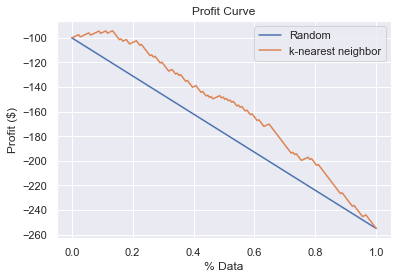

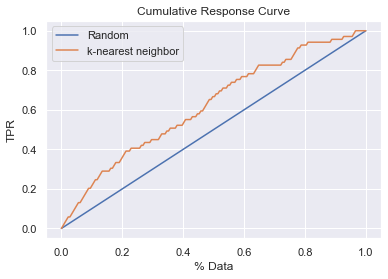

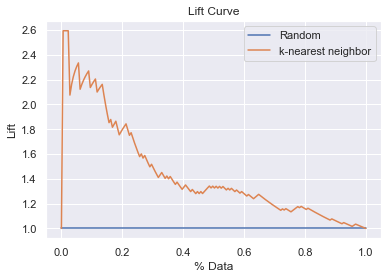

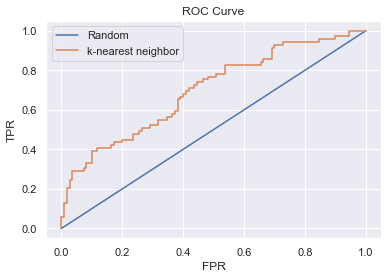

In [76]:
kNN=KNeighborsClassifier()
kNN.fit(X_train,np.ravel(y_train))
CMnorm = confusion_matrix(kNN.predict(X_test), y_test)
print(CMnorm)
TN, FN, FP, TP = CMnorm.ravel()
print(f"Expected profit on THIS dataset: {np.sum(CMnorm*profit)/len(y_train)}")

TPR = TP/(TP + FN)
FPR = FP/(FP + TN)
FNR = FN/(FN + TP)
TNR = TN/(TN + FP)
print(f"Expected profit for comparison: {pp*(TPR*TPp + FNR*FNp)+pn*(FPR*FPp + TNR*TNp)}")
knnProfit, knnCumResp, knnLift, knnROC, knnAUC = curves(kNN,X_test,y_test)
print("knnAUC: " + str(knnAUC))
plot_curves(knnProfit, knnCumResp, knnLift, knnROC, "k-nearest neighbor")

## Decision tree

[[75 17]
 [35 52]]
Expected profit on THIS dataset: -38.23033707865169
Expected profit for comparison: -129.72332015810275
dtcAUC: 0.7471673254281953


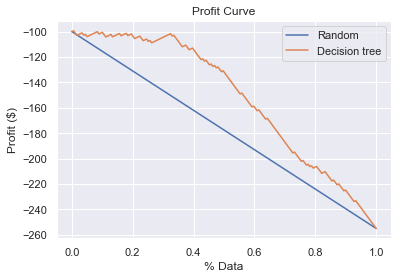

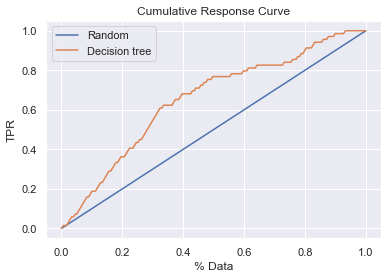

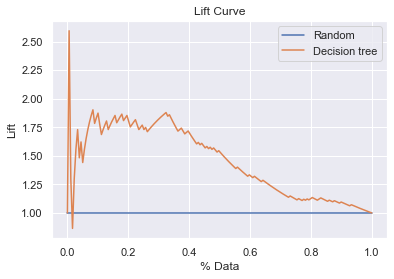

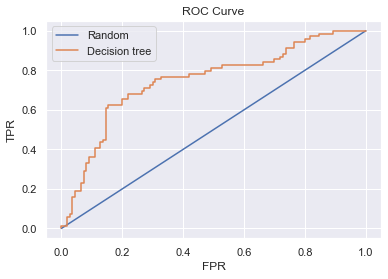

In [77]:
from sklearn import tree
dtc = tree.DecisionTreeClassifier(criterion='entropy')
dtc.fit(X_train,np.ravel(y_train))
CMnorm = confusion_matrix(dtc.predict(X_test), y_test)
print(CMnorm)
TN, FN, FP, TP = CMnorm.ravel()
print(f"Expected profit on THIS dataset: {np.sum(CMnorm*profit)/len(y_train)}")

TPR = TP/(TP + FN)
FPR = FP/(FP + TN)
FNR = FN/(FN + TP)
TNR = TN/(TN + FP)
print(f"Expected profit for comparison: {pp*(TPR*TPp + FNR*FNp)+pn*(FPR*FPp + TNR*TNp)}")
dtcProfit, dtcCumResp, dtcLift, dtcROC, dtcAUC = curves(dtc,X_test,y_test)
print("dtcAUC: " + str(dtcAUC))
plot_curves(dtcProfit, dtcCumResp, dtcLift, dtcROC, "Decision tree")

## Random forest

[[90 22]
 [20 47]]
Expected profit on THIS dataset: -30.435393258426966
Expected profit for comparison: -105.71146245059289
rfcAUC: 0.8309617918313564


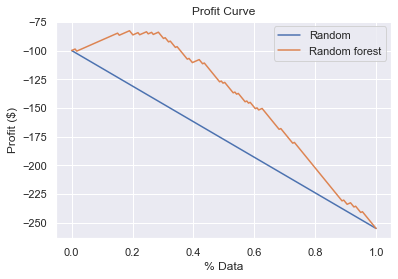

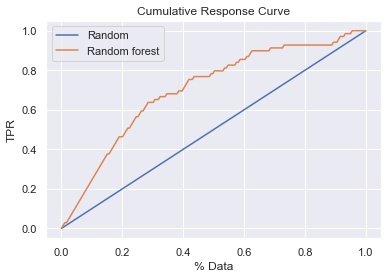

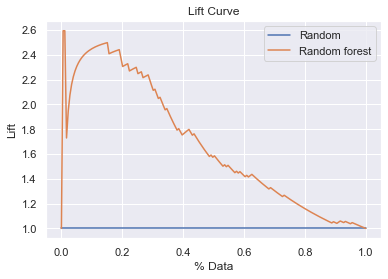

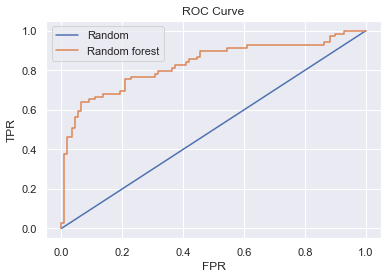

In [78]:
rfc = ensemble.RandomForestClassifier(criterion='entropy',n_estimators=10)
rfc.fit(X_train,np.ravel(y_train))
CMnorm = confusion_matrix(rfc.predict(X_test), y_test)
print(CMnorm)
TN, FN, FP, TP = CMnorm.ravel()
print(f"Expected profit on THIS dataset: {np.sum(CMnorm*profit)/len(y_train)}")

TPR = TP/(TP + FN)
FPR = FP/(FP + TN)
FNR = FN/(FN + TP)
TNR = TN/(TN + FP)
print(f"Expected profit for comparison: {pp*(TPR*TPp + FNR*FNp)+pn*(FPR*FPp + TNR*TNp)}")
rfcProfit, rfcCumResp, rfcLift, rfcROC, rfcAUC = curves(rfc,X_test,y_test)
print("rfcAUC: " + str(rfcAUC))
plot_curves(rfcProfit, rfcCumResp, rfcLift, rfcROC, "Random forest")

## Neural network

In [80]:
def create_model(lyrs=[8], act='linear', opt='Adam', dr=0.0):
    
    # set random seed for reproducibility
    seed(42)
    set_random_seed(42)
    
    model = Sequential()
    
    # create first hidden layer
    model.add(Dense(lyrs[0], input_dim=X_train.shape[1], activation=act))
    
    # create additional hidden layers
    for i in range(1,len(lyrs)):
        model.add(Dense(lyrs[i], activation=act))
    
    # add dropout, default is none
    model.add(Dropout(dr))
    
    # create output layer
    model.add(Dense(1, activation='sigmoid'))  # output layer
    
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    
    return model

In [81]:
import os
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

from numpy.random import seed
from tensorflow import set_random_seed

model = create_model(act='relu')

Using TensorFlow backend.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



[[98 25]
 [12 44]]
Expected profit on THIS dataset: -26.320224719101123
Expected profit for comparison: -93.12252964426877
nnetAUC: 0.8420289855072463


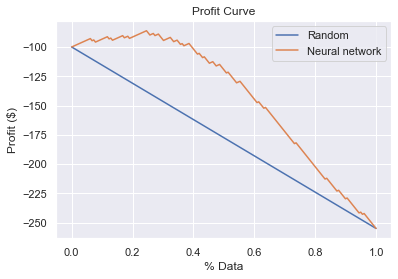

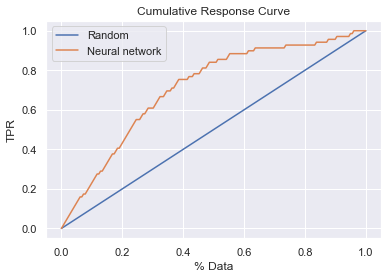

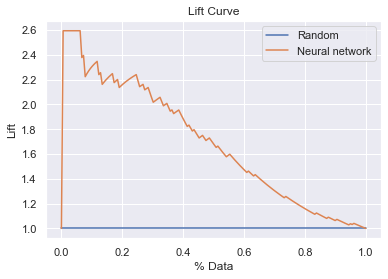

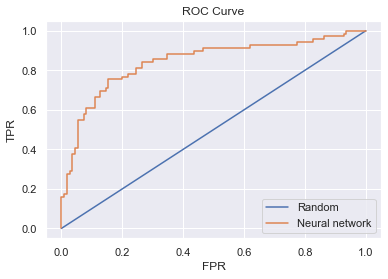

In [82]:
# Neural network
model.fit(X_train, np.ravel(y_train), epochs = 500, batch_size = 200, validation_split = 0.5, verbose = 0)
CMnorm = confusion_matrix(model.predict(X_test) > 0.5, y_test)
print(CMnorm)
TN, FN, FP, TP = CMnorm.ravel()
print(f"Expected profit on THIS dataset: {np.sum(CMnorm*profit)/len(y_train)}")

TPR = TP/(TP + FN)
FPR = FP/(FP + TN)
FNR = FN/(FN + TP)
TNR = TN/(TN + FP)
print(f"Expected profit for comparison: {pp*(TPR*TPp + FNR*FNp)+pn*(FPR*FPp + TNR*TNp)}")
nnetProfit, nnetCumResp, nnetLift, nnetROC, nnetAUC = curves(model,X_test,y_test)
print("nnetAUC: " + str(nnetAUC))
plot_curves(nnetProfit, nnetCumResp, nnetLift, nnetROC, "Neural network")

Text(0, 0.5, 'TPR')

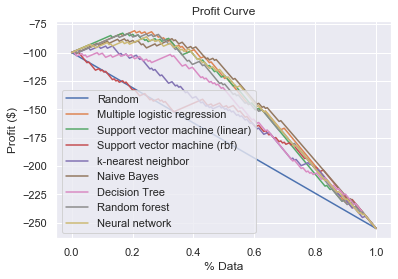

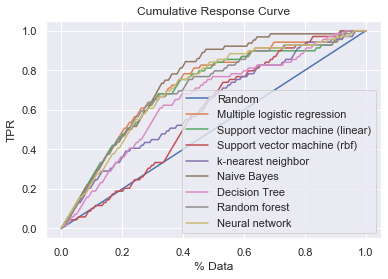

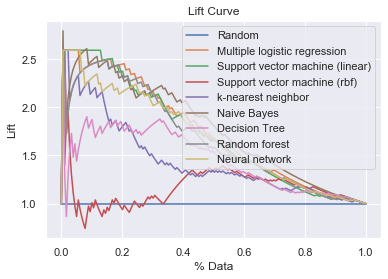

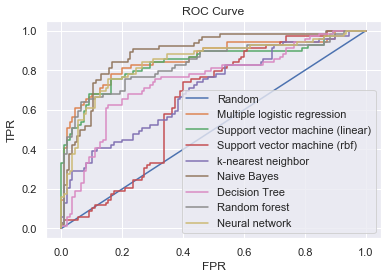

In [108]:
x = range(len(y_test)+1)
x = [x[k]/len(y_test) for k in range(len(x))]
all_curves = ("Random", "Multiple logistic regression", "Support vector machine (linear)", 
              "Support vector machine (rbf)", "k-nearest neighbor", "Naive Bayes","Decision Tree", 
              "Random forest", "Neural network")

#Profit Curves
plt.figure()
plt.plot([0,1],[nbcProfit[0],nbcProfit[-1]])
plt.plot(x,logregProfit)
plt.plot(x,svclProfit)
plt.plot(x,svcrbfProfit)
plt.plot(x,knnProfit)
plt.plot(x,nbcProfit)
plt.plot(x,dtcProfit)
plt.plot(x,rfcProfit)
plt.plot(x,nnetProfit)
plt.legend(all_curves)
plt.title("Profit Curve")
plt.xlabel("% Data")
plt.ylabel("Profit ($)")

#Cumulative Response Curves
plt.figure()
plt.plot([0,1],[0,1])
plt.plot(x,logregCumResp)
plt.plot(x,svclCumResp)
plt.plot(x,svcrbfCumResp)
plt.plot(x,knnCumResp)
plt.plot(x,nbcCumResp)
plt.plot(x,dtcCumResp)
plt.plot(x,rfcCumResp)
plt.plot(x,nnetCumResp)
plt.legend(all_curves)
plt.title("Cumulative Response Curve")
plt.xlabel("% Data")
plt.ylabel("TPR")

#Lift Curves
plt.figure()
plt.plot(x,np.ones(len(x)))
plt.plot(x,logregLift)
plt.plot(x,svclLift)
plt.plot(x,svcrbfLift)
plt.plot(x,knnLift)
plt.plot(x,nbcLift)
plt.plot(x,dtcLift)
plt.plot(x,rfcLift)
plt.plot(x,nnetLift)
plt.legend(all_curves)
plt.title("Lift Curve")
plt.xlabel("% Data")
plt.ylabel("Lift")

#ROC Curves
plt.figure()
plt.plot([0,1],[0,1])
plt.plot(logregROC[:,0],logregROC[:,1])
plt.plot(svclROC[:,0],svclROC[:,1])
plt.plot(svcrbfROC[:,0],svcrbfROC[:,1])
plt.plot(knnROC[:,0],knnROC[:,1])
plt.plot(nbcROC[:,0],nbcROC[:,1])
plt.plot(dtcROC[:,0],dtcROC[:,1])
plt.plot(rfcROC[:,0],rfcROC[:,1])
plt.plot(nnetROC[:,0],nnetROC[:,1])
plt.legend(all_curves)
plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")